In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import time

In [2]:
### APERÇU DES DONNÉES ###

In [3]:
# Chargement des données
data_train = pd.read_csv('X_train_rakuten_afterEDA_preprocessing.csv')
data_train.head()

,designation_orig,nom_img,lang_designation,designation,prdtypecode,designation_token_final
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,image_1263597046_product_3804725264.jpg,de,olivia: notebook personnalise / pages / punks...,10,"['notebook', 'page', 'design']"
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,image_1008141237_product_436067568.jpg,fr,journal des art (le) n° du // art et son ma...,2280,"['journal', 'art', 'art', 'marche', 'salon', '..."
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,image_938777978_product_201115110.jpg,fr,grand stylet ergonomique bleu gamepad nintendo...,50,"['stylet', 'ergonomique', 'gamepad', 'nintendo..."
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,image_457047496_product_50418756.jpg,fr,peluche donald europe disneyland (marionn...,1280,"['peluche', 'donald', 'europe', 'disneyland', ..."
4,La Guerre Des Tuques Luc a des idées de grande...,image_1077757786_product_278535884.jpg,fr,la guerre des tuques luc a des idees de grande...,2705,"['guerre', 'luc', 'idees', 'grandeur', 'vouloi..."


In [4]:
data_train.shape

(84613, 6)

In [5]:
### MACHINE LEARNING CLASSIQUE ###

In [6]:
## DÉFINITION FEATURES & LABELS

In [7]:
from tqdm.notebook import tqdm
import re

#Features

data_train['designation_str_tokens'] = ""
for i in tqdm(range(len(data_train))):
    data_train['designation_str_tokens'].iloc[i] += "".join(data_train['designation_token_final'].iloc[i]) 
data_train['designation_str_tokens'] = data_train['designation_str_tokens'].map(lambda x: re.sub(r',', '', x))
data_train['designation_str_tokens'] = data_train['designation_str_tokens'].map(lambda x: re.sub(r"'", '', x))

X_data_train = data_train.designation_str_tokens
X_data_train = X_data_train.str.replace("[", "").str.replace("]", "")

  0%|          | 0/84613 [00:00<?, ?it/s]

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/kj/6qcd42m1403fdwswxv5b1tz00000gn/T/ipykernel_10676/1825752030.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X_data_train = X_data_train.str.replace("[", "").str.replace("]", "")


In [8]:
# SANS STEMMATISATION

In [9]:
# Séparation des données
X = data_train.designation
y = data_train.prdtypecode

# Division des données
X_train_brut, X_test_brut, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)

In [10]:
X_train_brut

19014    decoration de noel femmes regarder la bande de...
72177    transformateur robot piscine dolphin gamme e l...
48245    regles avancees officielles de donjons & drago...
32201    oxford bloc de direction perfore  pages g lign...
40516        lot de  encyclopedie des armes n°  à  et n°  
                               ...                        
21243    hochet anneau adele l&#;elephante   nattou ce ...
45891    chargeur de batterie de voiture port usb siege...
42613                   à l'exterieur declenche: afrique d
43567    poussette baby walker  musicale + poupon minik...
68268                     console ps &#;  jeu &#; manette 
Name: designation, Length: 67690, dtype: object

In [11]:
# AVEC STEMMATISATION

In [12]:
# Séparation des données
X = X_data_train
y = data_train.prdtypecode

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)

In [13]:
X_train

19014    decoration noel femme regarder bande noel band...
72177    transformateur robot piscine dolphin gamm remp...
48245                   regle officiel donjon dragon maitr
32201    oxford bloc direction perfor page lignees couv...
40516                                lot encyclopedie arme
                               ...                        
21243    hochet anneau adel elephante nattou hochet ann...
45891    chargeur batterie voiture port usb siege charg...
42613                                     exterieur afriqu
43567    poussette baby musical poupon minikis poussett...
68268                                  console jeu manette
Name: designation_str_tokens, Length: 67690, dtype: object

In [14]:
y_train.value_counts()

2583    8132
1560    4061
2060    4026
1300    4005
2522    4003
1280    3847
2403    3803
2280    3758
1920    3472
1160    3128
1320    2607
10      2405
2705    2224
1140    2133
2582    2076
2585    2016
1302    1985
40      1977
1281    1669
50      1345
2462    1136
2905     670
60       658
2220     650
1301     649
1940     643
1180     612
Name: prdtypecode, dtype: int64

In [15]:
## VECTORISATION DES DONNÉES

In [16]:
# CRÉATION DES VECTORIZERS
tfvectorizer = TfidfVectorizer()
cvectorizer = CountVectorizer()

In [17]:
# SANS STEMMATISATION

In [18]:
# TfidfVectorizer
X_train_tf_brut = tfvectorizer.fit_transform(X_train_brut)
X_test_tf_brut = tfvectorizer.transform(X_test_brut)

X_train_tf_brut.shape

(67690, 114002)

In [19]:
print(X_train_tf_brut)

  (0, 76317)	0.043337151975561664
  (0, 110752)	0.13590638159807358
  (0, 21430)	0.10634484082268654
  (0, 110742)	0.13590638159807358
  (0, 22984)	0.044029886168262956
  (0, 26345)	0.03204912311247104
  (0, 52432)	0.07130725706964733
  (0, 9645)	0.051945598059030484
  (0, 21475)	0.06599324683049447
  (0, 102075)	0.09512593614658092
  (0, 53379)	0.06337607693673737
  (0, 1033)	0.04938636119059658
  (0, 82609)	0.13235980247445467
  (0, 69040)	0.1296088619868655
  (0, 110540)	0.13590638159807358
  (0, 14461)	0.13590638159807358
  (0, 7199)	0.12347694786255234
  (0, 28982)	0.04641512655940694
  (0, 97396)	0.14735504171476618
  (0, 72574)	0.07780976202176307
  (0, 59673)	0.024548357718875483
  (0, 104409)	0.05234606128622293
  (0, 23416)	0.09139055210288637
  (0, 22405)	0.08209143138311972
  (0, 99278)	0.08016122920777802
  :	:
  (67688, 96758)	0.03966436834924497
  (67688, 51538)	0.06465679754295264
  (67688, 81981)	0.07061261556386286
  (67688, 96684)	0.04773529766428956
  (67688, 106790

In [20]:
# CountVectorizer
X_train_cv_brut = cvectorizer.fit_transform(X_train_brut)
X_test_cv_brut = cvectorizer.transform(X_test_brut)

X_train_cv_brut.shape

(67690, 114002)

In [21]:
print(X_train_cv_brut)

  (0, 27260)	1
  (0, 26680)	16
  (0, 71452)	3
  (0, 40144)	1
  (0, 87092)	1
  (0, 58030)	4
  (0, 9014)	3
  (0, 84577)	4
  (0, 109643)	2
  (0, 68349)	2
  (0, 13138)	2
  (0, 68339)	2
  (0, 14661)	2
  (0, 18957)	2
  (0, 25542)	2
  (0, 97088)	1
  (0, 3983)	1
  (0, 14672)	1
  (0, 106354)	1
  (0, 100323)	1
  (0, 110528)	2
  (0, 23702)	1
  (0, 69028)	1
  (0, 101059)	2
  (0, 21911)	1
  :	:
  (67688, 39251)	1
  (67688, 29523)	1
  (67688, 77652)	1
  (67688, 27108)	1
  (67688, 81299)	2
  (67688, 89066)	1
  (67688, 12382)	1
  (67688, 6324)	1
  (67688, 110305)	1
  (67688, 84089)	1
  (67688, 95317)	1
  (67688, 44919)	1
  (67688, 24141)	1
  (67688, 65130)	1
  (67688, 40812)	1
  (67688, 40813)	1
  (67688, 108727)	1
  (67688, 71606)	1
  (67688, 66581)	3
  (67688, 90575)	1
  (67688, 11219)	1
  (67689, 55533)	1
  (67689, 22748)	1
  (67689, 63127)	1
  (67689, 83492)	1


In [22]:
# AVEC STEMMATISATION

In [23]:
# TfidfVectorizer
X_train_tf = tfvectorizer.fit_transform(X_train)
X_test_tf = tfvectorizer.transform(X_test)

X_train_tf.shape

(67690, 49175)

In [24]:
print(X_train_tf)

  (0, 47748)	0.14973994605044025
  (0, 9247)	0.13823112633873075
  (0, 47745)	0.14973994605044025
  (0, 9921)	0.04855101950213774
  (0, 22689)	0.06609072615559547
  (0, 4151)	0.05621428863942108
  (0, 9266)	0.07681181686007454
  (0, 43998)	0.10741244520187068
  (0, 23124)	0.06982696640000989
  (0, 390)	0.05440516630258837
  (0, 35551)	0.14973994605044025
  (0, 29780)	0.14973994605044025
  (0, 47660)	0.14973994605044025
  (0, 6207)	0.14973994605044025
  (0, 3110)	0.0895025093197969
  (0, 12609)	0.05112368218436073
  (0, 41930)	0.13049173783977122
  (0, 31273)	0.07362984850513785
  (0, 10077)	0.09133929044123125
  (0, 9673)	0.09005028386920058
  (0, 42750)	0.09158738807804842
  (0, 35550)	0.1552473656330569
  (0, 15550)	0.04763954730572349
  (0, 20563)	0.14973994605044025
  (0, 15862)	0.08422975149888695
  :	:
  (67688, 9941)	0.10715404127968797
  (67688, 2741)	0.11957145846920882
  (67688, 35255)	0.08163612133551379
  (67688, 3421)	0.2282263132699476
  (67688, 44619)	0.06696509029059852

In [25]:
# CountVectorizer
X_train_cv = cvectorizer.fit_transform(X_train)
X_test_cv = cvectorizer.transform(X_test)

X_train_cv.shape

(67690, 49175)

In [26]:
print(X_train_cv)

  (0, 11819)	1
  (0, 30839)	3
  (0, 17481)	1
  (0, 37492)	1
  (0, 3892)	2
  (0, 36373)	4
  (0, 47302)	2
  (0, 29492)	4
  (0, 5626)	2
  (0, 6293)	2
  (0, 8158)	2
  (0, 11051)	2
  (0, 41796)	1
  (0, 1673)	1
  (0, 6292)	1
  (0, 45903)	1
  (0, 43221)	1
  (0, 47652)	2
  (0, 10243)	1
  (0, 29774)	1
  (0, 9455)	1
  (0, 13003)	1
  (0, 15916)	1
  (0, 3887)	1
  (0, 26444)	1
  :	:
  (67688, 35223)	1
  (67688, 30790)	1
  (67688, 3588)	1
  (67688, 6444)	1
  (67688, 30055)	1
  (67688, 18720)	1
  (67688, 31365)	1
  (67688, 43657)	1
  (67688, 10576)	1
  (67688, 12851)	1
  (67688, 33396)	1
  (67688, 11738)	1
  (67688, 34982)	2
  (67688, 38332)	1
  (67688, 5285)	1
  (67688, 46909)	1
  (67688, 41018)	1
  (67688, 36188)	1
  (67688, 19510)	1
  (67688, 28111)	1
  (67688, 17777)	2
  (67688, 28753)	2
  (67689, 24030)	1
  (67689, 9833)	1
  (67689, 27224)	1


In [27]:
## CRÉATION DES CLASSIFIEURS

In [28]:
# Création des classificateurs
clf1 = LogisticRegression()
clf2 = SVC()
clf3 = RandomForestClassifier()
clf4 = VotingClassifier([('LR',clf1),('SVM',clf2),('RF',clf3)], voting = "hard")

In [29]:
## APPLICATION

In [30]:
# SANS STEMMATISATION - TFVECTORIZER

In [31]:
# Logistic Regression
start = time.time()

clf1.fit(X_train_tf_brut, y_train)
y_pred_clf1 = clf1.predict(X_test_tf_brut)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf1))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf1, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 8.8e+01ms
              precision    recall  f1-score   support

          10       0.42      0.51      0.46       617
          40       0.68      0.56      0.62       504
          50       0.79      0.79      0.79       333
          60       0.96      0.77      0.86       173
        1140       0.75      0.79      0.77       533
        1160       0.90      0.94      0.92       772
        1180       0.84      0.43      0.57       143
        1280       0.69      0.61      0.65      1019
        1281       0.67      0.46      0.55       400
        1300       0.85      0.93      0.89      1038
        1301       0.97      0.87      0.92       156
        1302       0.83      0.75      0.79       505
        1320       0.82      0.76      0.79       631
        1560       0.80      0.82      0.81      1012
        1920       0.89      0.91      0.90       830
        1940       0.91      0.79      0.85       160
        2060       0.78      0.79      0.78       9

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,313,6,0,0,3,1,0,8,2,3,...,2,151,68,0,7,1,1,2,44,0
40,44,283,35,1,7,8,0,10,12,3,...,1,46,19,14,4,0,1,0,10,2
50,5,12,263,2,5,1,0,1,3,4,...,0,1,0,20,4,1,0,1,0,0
60,1,8,8,134,1,0,0,1,1,0,...,0,2,0,15,0,0,0,0,1,1
1140,12,22,1,0,423,11,4,19,1,0,...,0,15,10,1,7,1,0,0,0,0
1160,14,5,0,0,4,726,0,0,2,0,...,0,14,5,0,0,0,1,0,1,0
1180,9,3,1,0,14,5,62,8,11,2,...,0,9,4,3,5,1,0,0,3,0
1280,20,19,1,0,53,6,2,620,36,136,...,4,14,16,0,13,1,4,2,10,0
1281,18,12,0,0,9,17,4,87,184,2,...,0,10,4,3,5,0,3,3,12,0


In [32]:
# SVC
start = time.time()

clf2.fit(X_train_tf_brut, y_train)
y_pred_clf2 = clf2.predict(X_test_tf_brut)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf2))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf2, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 2.1e+03ms
              precision    recall  f1-score   support

          10       0.37      0.56      0.45       617
          40       0.72      0.59      0.65       504
          50       0.78      0.84      0.81       333
          60       0.99      0.78      0.87       173
        1140       0.77      0.80      0.78       533
        1160       0.93      0.93      0.93       772
        1180       0.88      0.46      0.61       143
        1280       0.69      0.63      0.66      1019
        1281       0.70      0.48      0.57       400
        1300       0.86      0.92      0.89      1038
        1301       0.98      0.88      0.93       156
        1302       0.87      0.76      0.81       505
        1320       0.85      0.80      0.82       631
        1560       0.80      0.84      0.82      1012
        1920       0.90      0.92      0.91       830
        1940       0.94      0.81      0.87       160
        2060       0.82      0.78      0.80       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,345,4,0,0,1,1,0,7,2,1,...,2,161,59,0,3,0,0,2,24,0
40,52,298,38,0,5,5,0,10,12,2,...,1,43,14,9,3,0,0,2,5,1
50,8,11,280,0,2,0,0,2,1,1,...,0,3,0,14,2,1,0,1,0,0
60,5,5,5,135,0,0,0,1,0,0,...,0,1,0,20,0,0,0,0,0,1
1140,12,18,1,0,425,7,4,19,1,0,...,0,22,9,1,7,1,0,0,0,0
1160,22,3,0,0,4,719,0,0,4,0,...,0,17,2,0,0,0,0,0,1,0
1180,13,1,2,0,17,1,66,9,13,1,...,0,9,4,0,2,1,0,0,1,0
1280,32,16,2,0,51,3,1,643,28,139,...,6,11,13,0,6,1,4,1,7,0
1281,25,11,0,0,10,14,2,96,194,2,...,0,9,3,0,3,0,2,3,10,0


In [33]:
# Random Forest
start = time.time()

clf3.fit(X_train_tf_brut, y_train)
y_pred_clf3 = clf3.predict(X_test_tf_brut)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf3))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf3, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 7.7e+02ms
              precision    recall  f1-score   support

          10       0.44      0.49      0.46       617
          40       0.70      0.58      0.63       504
          50       0.83      0.74      0.78       333
          60       0.98      0.81      0.89       173
        1140       0.73      0.77      0.75       533
        1160       0.89      0.93      0.91       772
        1180       0.87      0.51      0.64       143
        1280       0.68      0.56      0.61      1019
        1281       0.65      0.46      0.53       400
        1300       0.83      0.90      0.87      1038
        1301       0.97      0.81      0.88       156
        1302       0.91      0.65      0.76       505
        1320       0.81      0.67      0.73       631
        1560       0.70      0.83      0.76      1012
        1920       0.90      0.90      0.90       830
        1940       0.90      0.64      0.75       160
        2060       0.72      0.77      0.74       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,300,7,0,0,1,2,0,1,3,0,...,0,140,111,1,4,0,4,0,37,0
40,40,292,19,0,6,8,1,8,9,1,...,0,34,35,17,3,0,3,0,14,1
50,3,13,246,0,3,1,0,3,2,7,...,0,2,3,27,4,0,2,1,0,1
60,0,2,5,140,0,0,1,0,0,0,...,0,2,0,20,0,0,1,0,1,1
1140,6,17,3,0,412,16,4,16,4,3,...,0,15,17,2,7,0,1,0,1,0
1160,5,8,0,0,5,719,0,0,1,0,...,0,16,11,0,0,0,4,1,2,0
1180,7,1,2,0,17,2,73,4,7,3,...,0,7,7,2,3,0,1,0,3,0
1280,18,15,1,0,64,8,2,572,48,151,...,0,18,26,0,12,0,16,0,17,1
1281,20,13,0,0,11,14,2,76,182,3,...,0,15,12,12,2,0,8,0,17,0


In [34]:
# Voting Classifier
start = time.time()

clf4.fit(X_train_tf_brut, y_train)
y_pred_clf4 = clf4.predict(X_test_tf_brut)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf4))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf4, rownames=['classes réelles'], colnames=['classes prédites'])

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Temps d'exécution : 2.9e+03ms
              precision    recall  f1-score   support

          10       0.38      0.57      0.46       617
          40       0.69      0.60      0.64       504
          50       0.80      0.83      0.81       333
          60       0.99      0.77      0.87       173
        1140       0.75      0.80      0.78       533
        1160       0.92      0.94      0.93       772
        1180       0.84      0.45      0.59       143
        1280       0.69      0.62      0.65      1019
        1281       0.71      0.47      0.56       400
        1300       0.86      0.93      0.89      1038
        1301       0.97      0.88      0.93       156
        1302       0.86      0.76      0.81       505
        1320       0.84      0.77      0.80       631
        1560       0.79      0.84      0.82      1012
        1920       0.90      0.92      0.91       830
        1940       0.94      0.81      0.87       160
        2060       0.82      0.78      0.80       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,352,5,0,0,2,2,0,6,1,1,...,2,149,63,0,3,0,1,2,24,0
40,54,302,35,0,5,4,1,10,9,2,...,1,38,16,9,3,0,0,0,8,2
50,6,11,277,0,2,0,0,2,1,1,...,0,2,0,17,3,1,0,1,0,0
60,4,7,6,134,0,0,0,1,0,0,...,0,1,0,18,0,0,0,0,1,1
1140,14,20,1,0,429,9,4,17,1,0,...,0,16,9,1,7,1,0,0,0,0
1160,17,5,0,0,3,726,0,0,3,0,...,0,14,2,0,0,0,1,0,1,0
1180,11,2,2,0,18,1,65,10,11,1,...,0,9,4,1,4,1,0,0,1,0
1280,30,16,1,0,54,4,2,635,29,141,...,4,12,16,0,8,1,4,1,8,0
1281,28,13,0,0,10,14,3,96,186,2,...,0,8,4,2,3,0,2,3,10,0


In [35]:
# SANS STEMMATISATION - CVECTORIZER

In [36]:
# Logistic Regression
start = time.time()

clf1.fit(X_train_cv_brut, y_train)
y_pred_clf1 = clf1.predict(X_test_cv_brut)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf1))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf1, rownames=['classes réelles'], colnames=['classes prédites'])

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Temps d'exécution : 9e+01ms
              precision    recall  f1-score   support

          10       0.32      0.60      0.42       617
          40       0.64      0.49      0.55       504
          50       0.75      0.81      0.78       333
          60       0.92      0.83      0.87       173
        1140       0.73      0.75      0.74       533
        1160       0.85      0.92      0.89       772
        1180       0.77      0.41      0.53       143
        1280       0.69      0.64      0.67      1019
        1281       0.55      0.46      0.50       400
        1300       0.92      0.90      0.91      1038
        1301       0.95      0.87      0.91       156
        1302       0.78      0.73      0.76       505
        1320       0.76      0.74      0.75       631
        1560       0.80      0.82      0.81      1012
        1920       0.91      0.89      0.90       830
        1940       0.87      0.81      0.84       160
        2060       0.78      0.74      0.76       966

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,368,6,0,0,0,2,0,3,1,2,...,1,121,83,0,5,0,3,0,16,0
40,80,247,30,1,14,21,0,13,15,2,...,0,30,27,9,0,0,2,2,2,2
50,5,13,270,4,3,1,0,8,1,3,...,0,0,2,11,3,1,0,3,0,0
60,3,5,8,144,0,0,0,1,0,0,...,0,1,0,9,1,0,0,0,0,1
1140,22,14,3,1,398,21,6,20,2,3,...,0,15,9,0,8,0,0,0,0,0
1160,29,3,0,0,2,713,0,1,6,0,...,0,8,9,0,0,0,1,0,0,0
1180,12,6,2,0,12,8,58,4,11,4,...,0,5,5,0,5,0,3,0,2,0
1280,33,12,3,1,56,7,2,657,75,46,...,4,8,14,1,9,5,3,3,3,0
1281,25,19,0,0,13,14,7,81,184,1,...,0,8,5,2,5,0,1,2,7,0


In [37]:
# SVC
start = time.time()

clf2.fit(X_train_cv_brut, y_train)
y_pred_clf2 = clf2.predict(X_test_cv_brut)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf2))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf2, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 1.6e+03ms
              precision    recall  f1-score   support

          10       0.34      0.44      0.38       617
          40       0.68      0.31      0.43       504
          50       0.81      0.64      0.72       333
          60       1.00      0.72      0.84       173
        1140       0.72      0.60      0.65       533
        1160       0.86      0.83      0.84       772
        1180       0.83      0.03      0.07       143
        1280       0.70      0.58      0.63      1019
        1281       0.62      0.37      0.46       400
        1300       0.90      0.81      0.85      1038
        1301       0.98      0.71      0.83       156
        1302       0.88      0.62      0.73       505
        1320       0.79      0.56      0.66       631
        1560       0.77      0.81      0.79      1012
        1920       0.90      0.87      0.88       830
        1940       0.98      0.60      0.74       160
        2060       0.78      0.74      0.76       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,270,0,0,0,1,1,0,1,1,0,...,0,122,208,1,2,0,1,0,8,0
40,41,158,29,0,1,14,0,6,12,1,...,0,39,165,21,2,0,1,2,4,4
50,10,8,214,0,6,6,0,0,1,4,...,0,5,30,28,5,0,0,3,0,3
60,2,4,5,124,0,1,0,0,2,0,...,0,3,17,13,0,0,0,0,1,1
1140,19,16,0,0,319,16,0,8,4,0,...,0,16,119,2,6,0,1,0,1,0
1160,24,0,0,0,5,642,0,2,2,0,...,0,24,71,2,0,0,0,0,0,0
1180,11,3,2,0,10,5,5,4,11,1,...,0,12,68,5,0,0,0,0,1,0
1280,22,19,3,0,53,5,1,589,19,77,...,2,15,109,3,10,0,7,1,9,19
1281,17,8,0,0,9,18,0,96,147,1,...,0,5,32,23,8,0,3,4,10,5


In [38]:
# Random Forest
start = time.time()

clf3.fit(X_train_cv_brut, y_train)
y_pred_clf3 = clf3.predict(X_test_cv_brut)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf3))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf3, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 1e+03ms
              precision    recall  f1-score   support

          10       0.44      0.49      0.47       617
          40       0.69      0.60      0.64       504
          50       0.85      0.75      0.80       333
          60       0.97      0.82      0.88       173
        1140       0.75      0.76      0.75       533
        1160       0.88      0.93      0.91       772
        1180       0.81      0.49      0.61       143
        1280       0.66      0.54      0.59      1019
        1281       0.63      0.45      0.52       400
        1300       0.83      0.90      0.86      1038
        1301       0.99      0.81      0.89       156
        1302       0.89      0.65      0.75       505
        1320       0.81      0.67      0.73       631
        1560       0.69      0.84      0.76      1012
        1920       0.90      0.90      0.90       830
        1940       0.94      0.59      0.72       160
        2060       0.74      0.76      0.75       966

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,302,4,0,0,1,2,0,4,2,0,...,0,155,97,1,3,0,4,0,37,0
40,30,301,17,0,4,11,2,4,9,3,...,0,46,25,23,3,0,3,0,18,0
50,3,11,249,1,2,1,0,1,2,9,...,0,2,3,28,2,0,5,0,0,0
60,1,0,4,141,0,0,1,0,0,0,...,0,1,1,21,0,0,2,0,0,0
1140,6,24,2,0,404,18,4,16,2,3,...,0,20,11,3,9,0,2,0,1,0
1160,5,8,0,0,5,718,1,0,2,0,...,0,20,6,0,0,0,3,1,3,0
1180,7,3,2,0,15,2,70,5,7,4,...,0,8,8,2,2,0,1,0,3,0
1280,19,19,1,0,62,8,2,552,58,147,...,0,22,29,0,8,0,18,0,18,1
1281,15,17,0,0,11,17,2,78,179,3,...,0,13,8,11,4,1,7,0,19,1


In [39]:
# Voting Classifier
start = time.time()

clf4.fit(X_train_cv_brut, y_train)
y_pred_clf4 = clf4.predict(X_test_cv_brut)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf4))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf4, rownames=['classes réelles'], colnames=['classes prédites'])

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Temps d'exécution : 2.9e+03ms
              precision    recall  f1-score   support

          10       0.32      0.59      0.42       617
          40       0.63      0.52      0.57       504
          50       0.78      0.81      0.80       333
          60       0.95      0.82      0.88       173
        1140       0.72      0.77      0.74       533
        1160       0.87      0.92      0.89       772
        1180       0.86      0.43      0.58       143
        1280       0.67      0.64      0.66      1019
        1281       0.64      0.42      0.51       400
        1300       0.89      0.90      0.90      1038
        1301       0.99      0.85      0.91       156
        1302       0.87      0.69      0.77       505
        1320       0.79      0.74      0.76       631
        1560       0.76      0.85      0.80      1012
        1920       0.91      0.90      0.90       830
        1940       0.95      0.70      0.81       160
        2060       0.81      0.77      0.79       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,367,3,0,0,1,1,0,1,1,0,...,0,113,113,1,3,0,2,0,8,0
40,79,262,27,0,3,14,0,6,11,2,...,0,32,45,12,1,0,1,1,2,2
50,7,15,270,0,3,2,0,2,0,4,...,0,0,6,18,1,0,0,0,0,0
60,4,5,10,141,0,0,0,0,1,0,...,0,1,0,10,0,0,0,0,0,1
1140,23,22,3,1,412,17,3,15,0,0,...,0,11,15,1,6,0,0,0,0,0
1160,28,3,0,0,2,713,0,0,1,0,...,0,10,14,0,0,0,1,0,0,0
1180,13,5,2,0,16,7,62,4,10,0,...,0,5,9,1,2,0,0,0,1,0
1280,33,24,4,0,60,6,1,650,37,89,...,1,8,33,0,7,0,6,1,7,0
1281,33,17,0,0,11,15,3,99,169,1,...,0,5,9,10,4,0,2,3,10,1


In [40]:
# AVEC STEMMATISATION - TFVECTORIZER

In [41]:
# Logistic Regression
start = time.time()

clf1.fit(X_train_tf, y_train)
y_pred_clf1 = clf1.predict(X_test_tf)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf1))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf1, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 4.1e+01ms
              precision    recall  f1-score   support

          10       0.54      0.47      0.51       617
          40       0.72      0.58      0.64       504
          50       0.77      0.78      0.77       333
          60       0.99      0.77      0.87       173
        1140       0.77      0.79      0.78       533
        1160       0.83      0.92      0.87       772
        1180       0.80      0.50      0.62       143
        1280       0.71      0.62      0.66      1019
        1281       0.67      0.49      0.57       400
        1300       0.86      0.94      0.90      1038
        1301       0.96      0.87      0.91       156
        1302       0.84      0.76      0.80       505
        1320       0.84      0.78      0.81       631
        1560       0.79      0.83      0.81      1012
        1920       0.90      0.92      0.91       830
        1940       0.88      0.80      0.84       160
        2060       0.79      0.78      0.79       9

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,293,3,0,0,1,15,0,4,2,1,...,3,156,61,0,11,1,0,3,49,0
40,17,294,32,1,7,22,1,13,13,3,...,3,51,14,9,5,0,2,4,5,3
50,1,19,259,0,4,1,0,0,3,5,...,1,4,0,21,1,0,1,3,0,0
60,2,5,9,133,0,2,0,2,0,0,...,0,1,0,19,0,0,0,0,0,0
1140,6,18,0,0,421,15,4,21,1,1,...,0,21,9,2,4,1,0,0,2,0
1160,10,5,0,0,4,714,0,2,0,0,...,0,25,4,1,4,0,0,0,0,0
1180,2,1,2,0,13,8,72,7,8,2,...,1,9,5,4,2,1,0,0,0,0
1280,14,9,2,0,51,12,4,627,38,125,...,4,24,12,0,13,1,6,2,5,0
1281,5,13,0,0,11,19,7,83,195,2,...,0,14,4,3,5,1,3,4,8,0


In [42]:
# SVC
start = time.time()

clf2.fit(X_train_tf, y_train)
y_pred_clf2 = clf2.predict(X_test_tf)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf2))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf2, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 1.3e+03ms
              precision    recall  f1-score   support

          10       0.52      0.56      0.54       617
          40       0.72      0.60      0.65       504
          50       0.79      0.82      0.81       333
          60       0.98      0.79      0.87       173
        1140       0.78      0.81      0.79       533
        1160       0.87      0.92      0.89       772
        1180       0.93      0.54      0.68       143
        1280       0.70      0.65      0.67      1019
        1281       0.70      0.50      0.58       400
        1300       0.87      0.93      0.90      1038
        1301       0.97      0.91      0.94       156
        1302       0.86      0.77      0.81       505
        1320       0.87      0.80      0.84       631
        1560       0.80      0.84      0.82      1012
        1920       0.90      0.93      0.92       830
        1940       0.93      0.81      0.87       160
        2060       0.82      0.78      0.80       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,343,2,0,0,1,9,0,2,4,1,...,3,159,43,0,9,1,0,2,32,0
40,28,302,32,1,5,19,0,12,12,1,...,3,50,9,11,3,0,1,3,6,3
50,2,12,274,0,2,1,0,2,2,2,...,1,6,0,20,0,0,1,1,0,0
60,2,9,9,136,0,3,0,0,1,0,...,0,0,0,13,0,0,0,0,0,0
1140,6,19,2,0,430,12,2,18,1,0,...,0,26,6,2,4,0,0,0,0,0
1160,17,8,1,0,4,711,0,2,0,1,...,0,21,2,0,1,0,0,0,1,0
1180,5,0,3,0,9,7,77,12,9,0,...,0,11,3,3,1,1,0,0,0,0
1280,11,11,1,0,49,7,1,661,28,128,...,5,37,6,0,7,0,4,1,3,0
1281,8,15,0,0,10,13,2,96,199,2,...,0,18,3,3,2,1,2,3,5,0


In [43]:
# Random Forest
start = time.time()

clf3.fit(X_train_tf, y_train)
y_pred_clf3 = clf3.predict(X_test_tf)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf3))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf3, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 4.2e+02ms
              precision    recall  f1-score   support

          10       0.47      0.40      0.43       617
          40       0.66      0.56      0.60       504
          50       0.81      0.76      0.78       333
          60       0.94      0.83      0.88       173
        1140       0.72      0.78      0.75       533
        1160       0.58      0.94      0.72       772
        1180       0.77      0.54      0.63       143
        1280       0.71      0.57      0.63      1019
        1281       0.69      0.49      0.58       400
        1300       0.84      0.93      0.88      1038
        1301       0.97      0.88      0.92       156
        1302       0.90      0.70      0.79       505
        1320       0.82      0.72      0.77       631
        1560       0.75      0.84      0.79      1012
        1920       0.89      0.92      0.90       830
        1940       0.87      0.81      0.84       160
        2060       0.77      0.79      0.78       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,247,15,1,0,1,81,1,3,5,1,...,1,114,100,1,6,1,0,0,31,0
40,19,280,26,3,9,47,1,8,15,1,...,2,20,21,29,4,0,2,3,9,0
50,3,15,252,0,5,4,0,2,0,5,...,0,3,1,27,3,0,3,0,0,1
60,1,3,6,143,0,3,0,0,0,0,...,0,0,0,15,1,0,0,0,0,1
1140,4,16,5,0,414,31,3,14,3,1,...,0,12,10,4,6,0,1,1,0,0
1160,6,13,0,0,2,723,1,3,0,0,...,0,9,4,1,5,0,1,1,2,0
1180,2,3,0,0,15,15,77,4,4,1,...,0,3,4,5,3,0,1,0,1,0
1280,9,22,2,0,67,31,5,582,45,148,...,0,7,16,4,12,1,7,0,6,0
1281,5,15,0,0,12,26,3,73,198,4,...,0,1,6,19,9,0,4,0,7,0


In [44]:
# Voting Classifier
start = time.time()

clf4.fit(X_train_tf, y_train)
y_pred_clf4 = clf4.predict(X_test_tf)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf4))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf4, rownames=['classes réelles'], colnames=['classes prédites'])

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Temps d'exécution : 1.8e+03ms
              precision    recall  f1-score   support

          10       0.51      0.54      0.53       617
          40       0.71      0.62      0.66       504
          50       0.78      0.82      0.80       333
          60       0.98      0.79      0.88       173
        1140       0.76      0.80      0.78       533
        1160       0.80      0.93      0.86       772
        1180       0.84      0.52      0.65       143
        1280       0.72      0.64      0.68      1019
        1281       0.72      0.50      0.59       400
        1300       0.87      0.94      0.90      1038
        1301       0.97      0.89      0.93       156
        1302       0.87      0.78      0.82       505
        1320       0.86      0.80      0.82       631
        1560       0.79      0.85      0.82      1012
        1920       0.90      0.93      0.92       830
        1940       0.92      0.81      0.86       160
        2060       0.82      0.79      0.80       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,335,2,0,0,1,18,0,3,5,1,...,3,143,52,0,9,1,0,2,34,0
40,27,311,30,1,4,24,0,10,12,1,...,3,43,9,11,4,0,1,2,5,3
50,2,13,273,0,3,1,0,1,2,3,...,1,4,0,20,0,0,1,1,0,0
60,2,8,9,137,0,3,0,0,0,0,...,0,0,0,14,0,0,0,0,0,0
1140,8,21,2,0,428,15,3,19,1,0,...,0,18,6,2,4,0,0,0,1,0
1160,12,7,0,0,4,720,0,2,0,0,...,0,19,2,0,3,0,0,0,0,0
1180,4,0,3,0,15,8,75,8,7,1,...,0,9,3,3,2,1,0,0,0,0
1280,15,14,2,0,56,14,3,649,27,130,...,3,21,9,0,9,0,4,1,4,0
1281,8,19,0,0,11,17,4,90,199,2,...,0,11,3,3,2,1,2,3,6,0


In [45]:
# AVEC STEMMATISATION - CVECTORIZER

In [46]:
# Logistic Regression
start = time.time()

clf1.fit(X_train_cv, y_train)
y_pred_clf1 = clf1.predict(X_test_cv)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf1))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf1, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 4e+01ms
              precision    recall  f1-score   support

          10       0.42      0.60      0.50       617
          40       0.66      0.63      0.64       504
          50       0.83      0.75      0.79       333
          60       0.95      0.80      0.87       173
        1140       0.77      0.77      0.77       533
        1160       0.80      0.94      0.87       772
        1180       0.74      0.61      0.67       143
        1280       0.72      0.67      0.70      1019
        1281       0.62      0.53      0.57       400
        1300       0.94      0.91      0.93      1038
        1301       0.97      0.90      0.93       156
        1302       0.85      0.78      0.81       505
        1320       0.81      0.78      0.80       631
        1560       0.82      0.84      0.83      1012
        1920       0.92      0.93      0.92       830
        1940       0.92      0.77      0.84       160
        2060       0.79      0.77      0.78       966

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,373,7,0,0,1,18,1,2,2,1,...,0,109,64,1,4,0,0,0,31,0
40,37,316,18,3,5,25,0,11,13,1,...,1,30,17,15,2,0,0,0,2,1
50,5,20,251,4,4,1,0,2,3,3,...,0,3,1,29,0,0,1,0,0,0
60,3,5,5,138,0,2,0,0,0,0,...,0,0,0,20,0,0,0,0,0,0
1140,12,24,2,0,408,18,6,29,2,1,...,0,10,8,4,2,0,0,0,0,0
1160,22,5,0,0,4,727,0,1,0,0,...,0,7,5,0,0,0,0,0,0,0
1180,8,1,4,0,9,9,87,5,2,0,...,0,7,5,2,2,0,0,0,0,0
1280,18,19,2,0,54,15,7,684,72,39,...,1,15,9,2,9,1,5,2,5,0
1281,16,14,1,0,9,16,12,65,213,0,...,0,5,3,9,4,1,1,1,5,0


In [47]:
# SVC
start = time.time()

clf2.fit(X_train_cv, y_train)
y_pred_clf2 = clf2.predict(X_test_cv)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf2))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf2, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 1.2e+03ms
              precision    recall  f1-score   support

          10       0.30      0.13      0.18       617
          40       0.68      0.36      0.47       504
          50       0.79      0.63      0.70       333
          60       1.00      0.73      0.85       173
        1140       0.77      0.64      0.70       533
        1160       0.84      0.67      0.74       772
        1180       0.91      0.22      0.36       143
        1280       0.71      0.58      0.64      1019
        1281       0.65      0.41      0.50       400
        1300       0.79      0.85      0.82      1038
        1301       0.98      0.79      0.87       156
        1302       0.88      0.66      0.76       505
        1320       0.79      0.60      0.68       631
        1560       0.78      0.81      0.79      1012
        1920       0.89      0.89      0.89       830
        1940       0.95      0.64      0.77       160
        2060       0.75      0.75      0.75       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,82,1,0,0,0,4,0,1,1,1,...,0,469,47,3,1,0,0,1,5,0
40,33,183,31,0,4,11,0,6,14,2,...,0,187,6,17,1,0,0,2,1,3
50,5,6,211,0,6,6,0,2,3,10,...,0,42,1,23,0,0,0,2,0,1
60,2,7,5,127,0,0,0,0,0,1,...,0,17,0,13,0,0,0,0,0,1
1140,5,20,3,0,342,13,0,11,5,0,...,0,113,4,2,8,0,0,0,0,0
1160,33,1,0,0,3,517,0,1,3,0,...,0,206,2,4,1,0,0,0,0,0
1180,2,1,0,0,7,6,32,5,5,1,...,0,64,1,15,1,0,0,0,0,0
1280,5,18,4,0,50,4,1,593,26,118,...,1,115,11,2,5,2,6,1,3,0
1281,5,11,0,0,8,14,2,87,163,7,...,0,41,3,22,9,0,2,3,4,3


In [48]:
# Random Forest
start = time.time()

clf3.fit(X_train_cv, y_train)
y_pred_clf3 = clf3.predict(X_test_cv)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf3))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf3, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 4.9e+02ms
              precision    recall  f1-score   support

          10       0.37      0.42      0.40       617
          40       0.64      0.55      0.59       504
          50       0.78      0.71      0.74       333
          60       0.91      0.82      0.86       173
        1140       0.73      0.77      0.75       533
        1160       0.60      0.92      0.73       772
        1180       0.62      0.55      0.58       143
        1280       0.71      0.57      0.63      1019
        1281       0.66      0.48      0.56       400
        1300       0.84      0.92      0.88      1038
        1301       0.97      0.85      0.91       156
        1302       0.89      0.70      0.78       505
        1320       0.82      0.71      0.76       631
        1560       0.75      0.85      0.80      1012
        1920       0.87      0.93      0.90       830
        1940       0.90      0.72      0.80       160
        2060       0.77      0.77      0.77       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,261,12,2,0,2,71,3,1,4,1,...,1,90,114,3,2,0,0,1,36,0
40,34,277,22,3,6,41,3,7,9,1,...,1,20,15,38,3,0,6,1,10,0
50,3,13,236,1,5,1,0,3,1,8,...,0,3,1,46,2,0,3,0,0,0
60,2,3,6,142,0,3,0,0,1,0,...,0,0,0,16,0,0,0,0,0,0
1140,8,19,2,3,410,29,4,13,3,1,...,0,7,11,7,3,0,1,2,0,0
1160,19,12,0,0,4,714,3,0,1,0,...,0,10,1,2,1,0,0,1,2,0
1180,4,2,3,0,13,15,78,4,5,1,...,0,2,4,2,2,0,0,0,1,0
1280,9,24,2,0,62,27,6,581,48,148,...,0,13,14,7,12,1,7,1,3,0
1281,13,17,0,0,12,23,7,79,191,2,...,0,3,1,17,9,1,2,2,4,0


In [49]:
# Voting Classifier
start = time.time()

clf4.fit(X_train_cv, y_train)
y_pred_clf4 = clf4.predict(X_test_cv)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf4))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf4, rownames=['classes réelles'], colnames=['classes prédites'])

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Temps d'exécution : 1.7e+03ms
              precision    recall  f1-score   support

          10       0.37      0.61      0.46       617
          40       0.62      0.60      0.61       504
          50       0.82      0.78      0.80       333
          60       0.98      0.81      0.89       173
        1140       0.74      0.78      0.76       533
        1160       0.76      0.91      0.83       772
        1180       0.73      0.53      0.62       143
        1280       0.71      0.64      0.67      1019
        1281       0.70      0.47      0.56       400
        1300       0.88      0.92      0.90      1038
        1301       0.97      0.90      0.93       156
        1302       0.86      0.76      0.81       505
        1320       0.82      0.76      0.79       631
        1560       0.79      0.85      0.82      1012
        1920       0.91      0.92      0.92       830
        1940       0.91      0.72      0.81       160
        2060       0.81      0.77      0.79       9

classes prédites,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
classes réelles,,,,,,,,,,,,,,,,,,,,,
10,375,9,1,0,0,14,0,3,1,1,...,1,143,55,2,2,0,0,0,4,0
40,60,301,24,1,5,18,0,11,10,1,...,0,37,7,20,2,0,0,0,2,1
50,6,17,261,0,5,3,0,0,2,3,...,0,4,1,25,0,0,0,0,0,0
60,5,6,4,140,0,2,0,0,0,0,...,0,1,0,14,0,0,0,0,0,1
1140,13,29,1,0,418,20,2,16,1,1,...,0,14,6,3,2,0,0,0,0,0
1160,36,12,0,0,5,703,0,1,1,0,...,0,11,2,0,1,0,0,0,0,0
1180,10,2,1,0,15,11,76,4,4,0,...,0,9,3,4,2,0,0,0,0,0
1280,22,28,5,0,57,17,7,657,35,104,...,0,17,7,0,7,0,4,1,2,0
1281,21,19,1,0,11,21,7,85,188,0,...,0,6,2,15,3,0,1,2,2,0


In [50]:
## TENDENCES DE CONFUSION

In [51]:
# Matrice de confusion classe 10
pd.crosstab(y_pred_clf4[y_test==10], y_test[y_test==10], colnames=['classe réelle'], rownames=['classes prédites'])

classe réelle,10
classes prédites,
10,375
40,9
50,1
1160,14
1280,3
1281,1
1300,1
1302,1
1320,1


In [52]:
# Matrice de confusion classe 1281
pd.crosstab(y_pred_clf4[y_test==1281], y_test[y_test==1281], colnames=['classe réelle'], rownames=['classes prédites'])

classe réelle,1281
classes prédites,
10,21
40,19
50,1
1140,11
1160,21
1180,7
1280,85
1281,188
1301,1


In [53]:
### DEEP LEARNING : WORD2VEC ###

In [55]:
from numpy import array
from keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, GlobalAveragePooling1D
from keras.utils import np_utils

In [ ]:
## DÉFINITION FEATURES & LABELS

In [56]:
list_class = [10, 2280 ,  50 ,1280 ,2705, 2522, 2582, 1560, 1281, 1920, 2403, 1140, 2583, 1180, 1300 ,2462, 1160, 2060 , 40,   60 ,1320 ,1302 ,2220 ,2905, 2585, 1940 ,1301]       
list_class_onehot = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

data_train['onehot']= 0
for i in range(len(data_train)):
    index = list_class.index(data_train['prdtypecode'].iloc[i])
    data_train['onehot'].iloc[i] = list_class_onehot[index]

data_train.head()

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,designation_orig,nom_img,lang_designation,designation,prdtypecode,designation_token_final,designation_str_tokens,onehot
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,image_1263597046_product_3804725264.jpg,de,olivia: notebook personnalise / pages / punks...,10,"['notebook', 'page', 'design']",[notebook page design],0
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,image_1008141237_product_436067568.jpg,fr,journal des art (le) n° du // art et son ma...,2280,"['journal', 'art', 'art', 'marche', 'salon', '...",[journal art art marche salon art asiatique pa...,1
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,image_938777978_product_201115110.jpg,fr,grand stylet ergonomique bleu gamepad nintendo...,50,"['stylet', 'ergonomique', 'gamepad', 'nintendo...",[stylet ergonomique gamepad nintendo wii speed...,2
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,image_457047496_product_50418756.jpg,fr,peluche donald europe disneyland (marionn...,1280,"['peluche', 'donald', 'europe', 'disneyland', ...",[peluche donald europe disneyland marionnette ...,3
4,La Guerre Des Tuques Luc a des idées de grande...,image_1077757786_product_278535884.jpg,fr,la guerre des tuques luc a des idees de grande...,2705,"['guerre', 'luc', 'idees', 'grandeur', 'vouloi...",[guerre luc idees grandeur vouloir organiser j...,4


In [57]:
y = data_train.onehot

In [58]:
X_encoded = [one_hot(i, 1000) for i in X]
X_padded = pad_sequences(X_encoded, 1000, padding='post')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y , test_size=0.2)

In [ ]:
## CRÉATION DU MODÈLE

In [60]:
model = Sequential()
model.add(Embedding(1000, 750))
model.add(GlobalAveragePooling1D())
model.add(Dense(27, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 750)         750000    
                                                                 
 global_average_pooling1d (G  (None, 750)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 27)                20277     
                                                                 
Total params: 770,277
Trainable params: 770,277
Non-trainable params: 0
_________________________________________________________________


2021-11-27 03:21:17.781310: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
## APPLICATION

In [61]:
history = model.fit(X_train, y_train, batch_size=100, epochs=11,validation_split=0.2)

Epoch 1/11
542/542 [==============================] - 171s 314ms/step - loss: 2.9689 - accuracy: 0.1488 - val_loss: 2.7006 - val_accuracy: 0.2655
Epoch 2/11
542/542 [==============================] - 172s 316ms/step - loss: 2.4900 - accuracy: 0.3248 - val_loss: 2.3210 - val_accuracy: 0.3741
Epoch 3/11
542/542 [==============================] - 168s 310ms/step - loss: 2.1966 - accuracy: 0.3874 - val_loss: 2.1014 - val_accuracy: 0.4038
Epoch 4/11
542/542 [==============================] - 171s 316ms/step - loss: 1.9984 - accuracy: 0.4488 - val_loss: 1.9297 - val_accuracy: 0.4823
Epoch 5/11
542/542 [==============================] - 166s 306ms/step - loss: 1.8534 - accuracy: 0.4916 - val_loss: 1.8187 - val_accuracy: 0.4856
Epoch 6/11
542/542 [==============================] - 167s 308ms/step - loss: 1.7459 - accuracy: 0.5143 - val_loss: 1.7261 - val_accuracy: 0.5125
Epoch 7/11
542/542 [==============================] - 166s 306ms/step - loss: 1.6608 - accuracy: 0.5370 - val_loss: 1.6549 -

In [ ]:
## EVALUATION

In [62]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 61.703354


In [63]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']

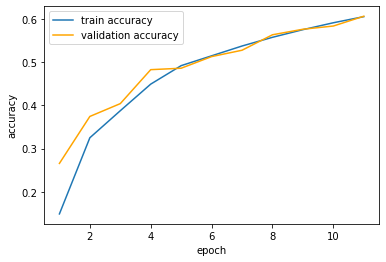

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Affichage graphique de l'évolution d'entrainement
plt.plot(np.arange(1,12,1), accuracy_train, label='train accuracy')
plt.plot(np.arange(1,12,1), accuracy_val, label ='validation accuracy',color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

In [65]:
from sklearn import metrics

# Prédiction
test_pred = model.predict(X_test)

# Transformation en vecteur
test_pred_class = np.argmax(test_pred, axis=1)

# Rapport de classification
print(metrics.classification_report(y_test, test_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       626
           1       0.25      0.59      0.35       949
           2       0.72      0.44      0.54       346
           3       0.54      0.48      0.51      1002
           4       0.70      0.59      0.64       515
           5       0.81      0.71      0.76      1027
           6       0.65      0.49      0.56       525
           7       0.70      0.70      0.70       997
           8       0.56      0.19      0.28       422
           9       0.88      0.87      0.87       863
          10       0.48      0.71      0.57       944
          11       0.70      0.48      0.57       524
          12       0.82      0.94      0.88      2021
          13       0.00      0.00      0.00       132
          14       0.82      0.74      0.77      1048
          15       0.67      0.24      0.35       288
          16       0.35      0.76      0.48       802
          17       0.76    

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# Matrice de confusion
import pandas as pd
pd.crosstab(y_test, test_pred_class, rownames=['real'], colnames=['prediction'])

prediction,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
real,,,,,,,,,,,,,,,,,,,,,
0,306,0,4,8,2,0,1,0,0,153,...,0,3,0,2,0,0,0,1,0,0
1,562,0,11,16,11,0,0,1,0,173,...,0,4,0,7,0,0,0,1,0,0
2,28,151,10,0,2,0,3,2,0,7,...,3,45,4,6,6,0,0,4,0,0
3,108,4,476,4,21,6,8,24,1,11,...,11,6,0,28,29,1,0,12,0,0
4,92,1,4,305,2,2,1,1,0,49,...,0,2,0,3,1,0,2,3,0,0
5,102,2,16,5,731,3,12,7,2,57,...,7,1,0,5,0,0,0,6,0,0
6,14,1,10,1,9,257,90,1,8,2,...,35,0,0,17,8,1,0,36,0,0
7,23,0,19,3,17,47,693,0,26,9,...,65,1,0,36,8,2,1,26,0,1
8,38,0,101,19,11,1,6,80,0,8,...,4,17,0,11,4,0,3,3,0,0


In [ ]:
### MIXTE MACHINE & DEEP LEARNING ###

In [68]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
from tqdm.notebook import tqdm
import numpy as np

In [ ]:
## DOC2VEC

In [69]:
train_tagged = [TaggedDocument(words=nltk.word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in tqdm(enumerate(X_data_train))]
train_tagged

0it [00:00, ?it/s]

[TaggedDocument(words=['notebook', 'page', 'design'], tags=['0']),
 TaggedDocument(words=['journal', 'art', 'art', 'marche', 'salon', 'art', 'asiatique', 'pari', 'jacques', 'barrere', 'francois', 'reforme', 'vente', 'enchere', 'public', 'fete', 'cent'], tags=['1']),
 TaggedDocument(words=['stylet', 'ergonomique', 'gamepad', 'nintendo', 'wii', 'speedlink', 'pilot', 'styl', 'pilot', 'styl', 'touch', 'pen', 'marqu', 'speedlink', 'stylet', 'ergonomique', 'gamepad', 'nintendo', 'wii', 'confort', 'optimal', 'precision', 'maximal', 'gamepad', 'wii', 'stylet', 'hautement', 'ergonomique', 'seulement', 'parfaitement', 'adapte', 'main', 'elegant', 'livre', 'support', 'fixe', 'adhesif', 'arriere', 'gamepad', 'modele', 'speedlink', 'pilot', 'styl', 'touch', 'pen', 'ref', 'fabricant', 'compatibilite', 'gamepad', 'nintendo', 'wii', 'forme', 'particulierement', 'ergonomique', 'excellent', 'tenue', 'main', 'point', 'revetement', 'long', 'dure', 'concevoir', 'ecran', 'tactile', 'support', 'gamepad'], ta

In [70]:
model = Doc2Vec(vector_size=100, epochs=10)
model.build_vocab(train_tagged)
model.train(train_tagged, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
## DÉFINITION FEATURES & LABELS

In [71]:
X = [i.split(" ") for i in X_data_train]
X = [model.infer_vector(phrase) for phrase in tqdm(X)]
X = np.array(X)

y = data_train.onehot

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

  0%|          | 0/84613 [00:00<?, ?it/s]

In [ ]:
## MACHINE LEARNING CLASSIQUE

In [72]:
# Logistic Regression
start = time.time()

clf1.fit(X_train, y_train)
y_pred_clf1 = clf1.predict(X_test)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf1))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf1, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 8.5ms
              precision    recall  f1-score   support

           0       0.33      0.07      0.11       622
           1       0.38      0.53      0.44       945
           2       0.59      0.29      0.39       361
           3       0.35      0.30      0.32       973
           4       0.83      0.51      0.63       528
           5       0.47      0.47      0.47      1024
           6       0.52      0.32      0.40       495
           7       0.50      0.44      0.47      1023
           8       0.40      0.14      0.21       421
           9       0.46      0.42      0.44       846
          10       0.29      0.54      0.38       927
          11       0.51      0.31      0.39       527
          12       0.36      0.71      0.48      2063
          13       0.29      0.03      0.05       143
          14       0.60      0.52      0.56       984
          15       0.33      0.06      0.11       266
          16       0.34      0.59      0.43       756
 

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classes prédites,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
classes réelles,,,,,,,,,,,,,,,,,,,,,
0,41,159,0,7,6,28,0,2,1,0,...,1,3,0,2,0,0,0,0,0,0
1,11,500,1,6,4,35,0,5,1,1,...,0,3,0,4,0,0,0,0,0,0
2,0,8,104,11,0,10,0,10,0,11,...,8,52,9,5,5,1,0,2,0,0
3,6,35,5,294,0,34,3,20,32,14,...,26,8,0,32,28,3,1,5,1,3
4,5,88,0,2,267,6,0,2,1,1,...,1,1,0,0,0,0,5,0,3,0
5,3,50,2,28,1,478,3,25,6,8,...,28,5,0,7,1,0,0,6,1,1
6,2,7,2,9,0,19,160,79,1,20,...,51,0,0,8,15,0,0,21,2,2
7,6,18,4,24,5,49,49,453,3,76,...,91,4,4,18,17,5,1,23,4,5
8,4,8,0,83,8,23,1,8,61,5,...,8,15,2,5,9,1,11,1,0,1


In [73]:
# SVC
start = time.time()

clf2.fit(X_train, y_train)
y_pred_clf2 = clf2.predict(X_test)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf2))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf2, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 8.9e+02ms
              precision    recall  f1-score   support

           0       0.35      0.11      0.17       622
           1       0.44      0.51      0.47       945
           2       0.69      0.39      0.50       361
           3       0.50      0.40      0.44       973
           4       0.87      0.50      0.64       528
           5       0.47      0.54      0.50      1024
           6       0.63      0.42      0.50       495
           7       0.50      0.62      0.55      1023
           8       0.61      0.25      0.35       421
           9       0.62      0.67      0.65       846
          10       0.28      0.60      0.38       927
          11       0.52      0.38      0.44       527
          12       0.65      0.77      0.71      2063
          13       0.67      0.04      0.08       143
          14       0.71      0.66      0.69       984
          15       0.43      0.25      0.31       266
          16       0.31      0.73      0.44       7

classes prédites,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
classes réelles,,,,,,,,,,,,,,,,,,,,,
0,70,143,1,3,5,21,0,2,1,0,...,1,5,0,3,0,0,0,0,0,0
1,40,485,0,2,3,23,0,1,2,0,...,1,5,0,6,0,0,0,0,2,0
2,2,11,141,4,0,11,0,27,1,8,...,6,21,3,1,4,0,0,4,0,0
3,6,24,4,388,2,36,3,30,15,26,...,18,4,0,26,21,0,0,5,2,1
4,15,61,0,5,265,3,2,18,1,1,...,4,0,0,1,0,0,7,2,2,1
5,4,51,1,9,2,552,5,28,5,32,...,17,5,0,8,1,2,0,8,2,0
6,1,4,0,6,0,14,206,111,1,12,...,49,0,0,8,5,2,0,16,1,0
7,4,3,2,10,1,55,38,633,0,54,...,92,3,1,7,4,2,1,19,1,1
8,5,9,2,95,4,22,0,11,104,11,...,7,12,0,3,6,0,7,5,0,0


In [74]:
# Random Forest
start = time.time()

clf3.fit(X_train, y_train)
y_pred_clf3 = clf3.predict(X_test)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf3))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf3, rownames=['classes réelles'], colnames=['classes prédites'])

Temps d'exécution : 1.1e+02ms
              precision    recall  f1-score   support

           0       0.19      0.11      0.14       622
           1       0.31      0.57      0.40       945
           2       0.75      0.12      0.21       361
           3       0.38      0.28      0.32       973
           4       0.76      0.47      0.58       528
           5       0.44      0.52      0.48      1024
           6       0.68      0.24      0.36       495
           7       0.44      0.57      0.50      1023
           8       0.53      0.08      0.14       421
           9       0.62      0.59      0.60       846
          10       0.29      0.54      0.38       927
          11       0.46      0.30      0.36       527
          12       0.47      0.86      0.61      2063
          13       0.67      0.06      0.10       143
          14       0.61      0.54      0.58       984
          15       0.55      0.21      0.31       266
          16       0.37      0.67      0.48       7

classes prédites,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
classes réelles,,,,,,,,,,,,,,,,,,,,,
0,69,225,1,2,8,27,0,1,0,2,...,0,10,0,1,0,0,0,0,0,0
1,45,535,0,1,4,36,0,2,0,0,...,0,6,0,5,0,0,0,0,0,0
2,3,20,44,18,0,22,1,30,2,10,...,20,6,0,2,1,0,1,1,0,0
3,15,74,0,273,1,37,1,48,7,20,...,34,1,0,26,3,0,0,0,0,0
4,18,72,0,8,250,10,1,12,2,0,...,10,0,0,0,0,0,1,0,0,0
5,16,76,0,11,1,533,1,30,2,22,...,24,3,0,3,0,0,0,1,0,0
6,1,9,0,15,2,17,121,134,1,11,...,47,0,0,5,0,0,0,11,0,0
7,3,16,0,18,7,47,14,588,0,56,...,93,0,0,7,1,0,0,4,0,0
8,14,30,2,77,12,33,1,19,34,9,...,18,3,0,3,0,0,6,2,0,0


In [75]:
# Voting Classifier
start = time.time()

clf4.fit(X_train, y_train)
y_pred_clf4 = clf4.predict(X_test)

end = time.time()
print(f'Temps d\'exécution : {end - start:.2}ms')

# Classification Report
print(classification_report(y_test, y_pred_clf4))

# Matrice de confusion
pd.crosstab(y_test, y_pred_clf4, rownames=['classes réelles'], colnames=['classes prédites'])

/Users/haeji/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Temps d'exécution : 1e+03ms
              precision    recall  f1-score   support

           0       0.23      0.13      0.17       622
           1       0.34      0.57      0.43       945
           2       0.66      0.42      0.51       361
           3       0.41      0.42      0.42       973
           4       0.82      0.54      0.65       528
           5       0.45      0.57      0.50      1024
           6       0.60      0.42      0.49       495
           7       0.52      0.59      0.55      1023
           8       0.64      0.18      0.28       421
           9       0.63      0.64      0.64       846
          10       0.29      0.61      0.39       927
          11       0.56      0.34      0.42       527
          12       0.58      0.81      0.67      2063
          13       0.71      0.03      0.07       143
          14       0.71      0.60      0.65       984
          15       0.50      0.16      0.24       266
          16       0.38      0.68      0.49       756

classes prédites,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
classes réelles,,,,,,,,,,,,,,,,,,,,,
0,81,175,0,5,6,24,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,43,541,0,3,2,26,0,0,0,0,...,0,2,0,3,0,0,0,0,0,0
2,12,19,150,7,0,14,0,15,1,9,...,6,14,3,1,2,0,0,0,0,0
3,15,53,5,407,0,44,4,19,10,23,...,17,1,0,20,12,0,0,2,1,1
4,22,72,0,7,284,4,1,3,0,0,...,1,0,0,1,0,0,3,0,2,0
5,14,77,1,23,2,584,4,21,3,19,...,13,2,0,4,0,0,0,2,1,0
6,3,12,1,11,0,19,206,102,0,11,...,43,0,0,7,3,0,0,12,1,0
7,6,18,2,31,5,70,42,600,0,55,...,70,2,1,5,3,2,1,13,1,0
8,11,23,2,109,8,27,1,12,74,8,...,4,6,0,1,3,0,9,2,0,0
